<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados I
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Arquivos CSV;</li>
  <li>Arquivos Texto;</li>
  <li>Arquivos Excel.</li>
</ol>

---

# **Aulas**

## 0\. Estruturas de dados

*   **Não estruturado**: texto, imagem, aúdio, etc.
*   **Semi estruturado**: html, json, etc.
*   **Estruturado**: tabelas, planilhas, etc.



## 1\. Arquivos CSV

### **1.1. Formato** 

Um arquivo **csv** é um tipo de arquivo de **texto** com uma estrutura específica (**estruturado**) para organizar os dados num formato tabular: 


*   **Linhas** são separadas pelo caracter de nova linha `'\n'`, normalmente a primeira coluna é o cabeçalho (*header*);
*   **Colunas** por um separador: `','` (mais comum), `';'`, etc.

É um tipo de arquivo muito utilizado (talvez o mais utilizado) para armazenar dados no mundo analítico.


**Arquivo CSV:** banco.csv

In [1]:
%%writefile banco.csv
age,job,marital,education,default,balance,housing,loan
30,unemployed,married,primary,no,1787,no,no
33,services,married,secondary,no,4789,yes,yes
35,management,single,tertiary,no,1350,yes,no
30,management,married,tertiary,no,1476,yes,yes
59,blue-collar,married,secondary,no,0,yes,no
35,management,single,tertiary,no,747,no,no
36,self-employed,married,tertiary,no,307,yes,no
39,technician,married,secondary,no,147,yes,no
41,entrepreneur,married,tertiary,no,221,yes,no
43,services,married,primary,no,-88,yes,yes

Writing banco.csv


**Exemplo**: Extraindo os valores da primeira coluna (idade).

In [2]:
idades = []

with open(file='./banco.csv', mode='r', encoding='utf8') as arquivo:
  cabecalho = arquivo.readline().split(sep=',')
  indice_idade = cabecalho.index('age')
  linha = arquivo.readline()
  while linha:
    idade = linha.split(sep=',')[indice_idade]
    idades.append(idade)
    linha = arquivo.readline()

print(idades)

['30', '33', '35', '30', '59', '35', '36', '39', '41', '43']


**Exemplo**: Tipo dos dados.

In [3]:
tipos_idades = set(map(lambda idade: type(idade), idades))
print(tipos_idades)

{<class 'str'>}


**Exemplo**: Média das idades.

In [4]:
from functools import reduce

soma_idades = reduce(lambda idade_a, idade_b: idade_a + idade_b, map(lambda idade: int(idade), idades))
qtd_idades = len(idades)

media_idades = soma_idades / qtd_idades
print(f"A média das idades é de {media_idades}.")

A média das idades é de 38.1.


### **1.2. Pacote CSV** 

Pacote nativo do Python que facilita a leitura de arquivos no formato CSV.

In [5]:
import csv

saldos = None

with open(file='./banco.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('balance')
  saldos = [linha[indice_saldo] for linha in leitor_csv_iter]
  
print(saldos)


['1787', '4789', '1350', '1476', '0', '747', '307', '147', '221', '-88']


**Exemplo**: Média dos saldos.

In [6]:
from functools import reduce

soma_saldos = reduce(lambda saldo_a, saldo_b: saldo_a + saldo_b, map(lambda saldo: int(saldo), saldos))
qtd_saldos = len(saldos)

media_saldos = soma_saldos / qtd_saldos
print(f"A média dos saldos é de {media_saldos}.")

A média dos saldos é de 1073.6.


---
**(by VRO) Extrair a coluna job utilizando os dois métodos anteriores** 

*Método mais manual:*

In [19]:
jobs = []

with open(file='./banco.csv', mode='r', encoding='utf8') as arquivo:
  cabecalho = arquivo.readline().split(sep=',')
  indice_job = cabecalho.index('job')
  linha = arquivo.readline()
  while linha:
    job = linha.split(sep=',')[indice_job]
    jobs.append(job)
    linha = arquivo.readline()

print(f'Extraindo "jobs":')
jobs

Extraindo "jobs":


['unemployed',
 'services',
 'management',
 'management',
 'blue-collar',
 'management',
 'self-employed',
 'technician',
 'entrepreneur',
 'services']

In [18]:
educations = []

with open(file='./banco.csv', mode='r', encoding='utf8') as fp:
  cabecalho = fp.readline().split(sep=',')
  education_indice = cabecalho.index('education') 
  linha = fp.readline()
  while linha:
    education = linha.split(sep=',')[education_indice]
    educations.append(education)
    linha = fp.readline()

print(f'Extraindo "educations":')
educations

Extraindo "educations":


['primary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'tertiary',
 'tertiary',
 'secondary',
 'tertiary',
 'primary']

*Método com o pacote csv:*

In [23]:
import csv

all_housing = []

with open(file='./banco.csv', mode='r', encoding='utf8') as fp:
  iterador = csv.reader(fp, delimiter=',')
  cabecalho = next(iterador)
  indice_housing = cabecalho.index('housing')
  all_housing = [linha[indice_housing] for linha in iterador]

print(f'All Housing Information:\n{all_housing}')

All Housing Information:
['no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes']


## 2\. Arquivos de Texto

### **2.1. Formato** 

Um arquivo **texto** é um tipo de arquivo de **texto** sem uma estrutura definida (**não estruturado**). 


**Arquivo TXT:** nubank.txt

In [25]:
%%writefile nubank.txt
Como você prefere falar com a gente?

E-mail
Tem alguma dúvida? Podemos te ajudar pelo nosso canal de email.
meajuda@nubank.com.br

Telefone
Você pode ligar para o 0800 do Nubank a qualquer hora através do número abaixo.
0800 608 6236

Chat
Precisa de uma ajuda agora? Entre em contato com nosso atendimento através do chat.
Basta abrir o chat no app.

Siga o @Nubank
Saiba das novidades e receba dicas na nossas redes sociais e também na NuCommunity, a comunidade online oficial do Nubank.

Imprensa
Reunimos todas as informações para você aqui.
press@nu.bank

Ouvidoria
Já conversou conosco e mesmo assim não
conseguiu resolver o que precisava? Nossa
Ouvidoria pode avaliar seu caso.
0800 887 0463
ouvidoria@nubank.com.br

Atendemos em dias úteis das 9h às 18h
(horário de São Paulo/SP).

Parcerias
Se você tem uma proposta de patrocínio, parceria
ou publicidade, fale conosco por aqui: marketing@nubank.com.br

Writing nubank.txt


**Exemplo**: Extrair e-mails de um arquivo de texto.

*   Extrair as linhas do arquivo.

In [ ]:
with open(file='./nubank.txt', mode='r', encoding='utf8') as arquivo:
  linhas = arquivo.readlines()
  
print(linhas)

*   Limpar as linhas do caracter de nova linha `'\n'`

In [ ]:
linhas = filter(lambda linha: linha != '\n', linhas)
linhas = map(lambda linha: linha.strip(), linhas)
linhas = list(linhas)

print(linhas)

*   Extrair linhas com o texto `'.com'`



In [ ]:
linhas_com_email = filter(lambda linha: '.com' in linha, linhas)
linhas_com_email = list(linhas_com_email)

print(linhas_com_email)

*   Extrair emails das linhas com o texto `'.com'`

In [ ]:
emails_extraidos = []

for linha_com_email in linhas_com_email:

  palavras = linha_com_email.split(sep=' ')
  emails = filter(lambda palavra: '@' in palavra, palavras)
  emails_extraidos = emails_extraidos + list(emails)

print(emails_extraidos)

*   E o press@nu.bank? :(

### **2.2. Regex** 

É um algoritmo de busca de padrões em strings e é implementado nativamente em diversas linguagens de programação. Você pode ler mais sobre regex neste [link](https://medium.com/javarevisited/7-best-regular-expression-courses-for-developers-to-learn-in-2021-9b8cb37bb3a5) e testar seu regex na ferramenta online deste [link](https://regexr.com/).

```python
import re

lista_padroes = re.findall('<string de busca>', texto)
```

**Exemplo**: Extrair e-mails de um arquivo de texto.

*   String de busca.

Para encontrar emails no arquivo de texto, vamos utilizar string de busca `'\S+@\S+'`, onde:

*   `\S+` encontra um sequencia de caracteres sem espaço;
*   `@` encontra o caracter '@'
*   `\S+` encontra um sequencia de caracteres sem espaço.



*   Código de extração.

In [26]:
import re

with open(file='./nubank.txt', mode='r', encoding='utf8') as arquivo:
  texto = arquivo.read()
  
emails_extraidos = re.findall('\S+@\S+', texto)
print(emails_extraidos)

['meajuda@nubank.com.br', 'press@nu.bank', 'ouvidoria@nubank.com.br', 'marketing@nubank.com.br']


---
**(by VRO) Extrair informações de um txt qualquer utilizando o regex:**

*Escrevendo um arquivo.txt*

In [27]:
%%writefile ceramica.txt
Associação Brasileira de Cerâmica
Av. Prof. Almeida Prado, 532 - IPT - Prédio 36 - 2º Andar - Sala 03 , Cidade Universitária - 05508-901 - São Paulo/SP -Brazil, Tel./Fax: +55 (11) 3768-7101 / +55 (11) 3768-4284 - São Paulo - SP - Brazil
E-mail: ceram.abc@gmail.com Acompanhe os números deste periódico no seu leitor de RSS
SciELO - Scientific Electronic Library Online
Av. Onze de Junho, 269 - Vila Clementino 04041-050 São Paulo SP - Brasil
E-mail: scielo@scielo.org

Writing ceramica.txt




```
import re

#ABRIR/LER ARQUIVO.TXT
#EXTRAIR USANDO O MÉTODO 'FINDALL'
#PRINTAR NA TELA
```



In [34]:
import re

with open(file='./ceramica.txt', mode='r', encoding='utf8') as fp:
  texto_ceramica = fp.read()

emails_ceramica_inicial = re.findall('\S+@\S+', texto_ceramica)
print(emails_ceramica_inicial)

['ceram.abc@gmail.com', 'scielo@scielo.org']


**Salvando essas informaçoes em um arquivo.csv:**

In [39]:
import csv

with open(file='./emails_ceramica_home.csv', mode='w', encoding='utf8') as fp:
  escritor = csv.writer(fp, delimiter=',')
  escritor.writerows([['email']] + list(map(lambda email: [email], emails_ceramica_inicial)))

---

*   Codigo para salvar em um arquivo csv.

In [45]:
import csv

with open(file='./nubank.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['email']] + list(map(lambda email_extraido: [email_extraido], emails_extraidos)))

**Exemplo**: Extrair perfil de redes sociais.

In [ ]:
import re

with open(file='./nubank.txt', mode='r', encoding='utf8') as arquivo:
  texto = arquivo.read()
  
perfil_extraidos = re.findall('@\S+', texto)
perfil_extraidos = filter(lambda perfil: '.' not in perfil, perfil_extraidos)
perfil_extraidos = list(perfil_extraidos)

print(perfil_extraidos)

## 3\. Arquivos Excel

### **3.1. Formato** 

Um arquivo tabular nativo do Windows, sistema operacional da Microsoft.




**Arquivo Excel:** banco.xlsx

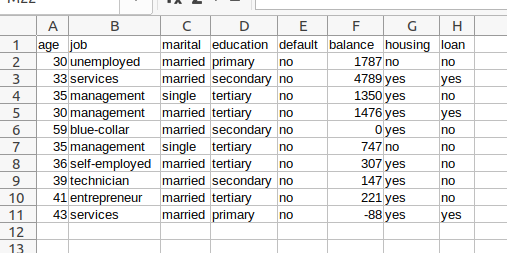



*   Download



In [ ]:
!wget --show-progress --continue -O ./banco.xlsx https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/banco.xlsx

### **2.2. Pacote openpyxl** 

Pacote Python para interagir com planilhas excel. A documentação pode ser encontrada neste [link](https://openpyxl.readthedocs.io/en/stable/index.html).

In [ ]:
!pip install openpyxl

**Exemplo**: Média dos saldos.

In [ ]:
from openpyxl import load_workbook

planilhas = load_workbook(filename='banco.xlsx')
planilha = planilhas.active

In [ ]:
saldos = []

cabecalho = next(planilha.values)
indice_saldo = cabecalho.index('balance')
saldos = [linha[indice_saldo] for linha in planilha.values if linha[indice_saldo] != 'balance']

print(saldos)

**Exemplo**: Tipo dos dados.

In [ ]:
print(set(map(lambda saldo: type(saldo), saldos)))

**Exemplo**: Média dos saldos.

In [ ]:
from functools import reduce

soma_saldos = reduce(lambda saldo_a, saldo_b: saldo_a + saldo_b, saldos)
qtd_saldos = len(saldos)

media_saldos = soma_saldos / qtd_saldos
print(f"A média dos saldos é de {media_saldos}.")